# Titanic Dataset: Exploratory Data Analysis

In this notebook, we're going to analyse the famous Titanic dataset from Kaggle. The dataset is meant for supervised machine learning, but we're only going to do some exploratory analysis at this stage.

We'll try to answer the following questions:


<ul>
<li>Who were the passengers on the Titanic? (age, gender, class.. etc)</li>
<li>What deck were the passengers on and how does that relate to their class?</li>
<li>Where did the passengers come from?</li>
<li>Who was alone and who was with family?</li>
<li>What factors helped someone survive the sinking?</li>
</ul>

# Import Librarys

In [3]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# This is Titanic Data of Survived Passengers 
titanic_df = pd.read_csv('titanic_train.csv')

In [5]:
#Looking at the first few rows in the dataset.
titanic_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Total Rows and Columns
titanic_df.shape

(891, 12)

In [7]:
#Information about the dataset. 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# To check there is NULL values 
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So, in cadin and age columns there are some missing values

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
#Function to detect if a person is a man, woman or child.
def man_wom_chi(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

#Using Pandas' apply method to create a new column "Person"
titanic_df['Person'] = titanic_df.apply(man_wom_chi,axis=1)

In [12]:
# Shows top ten Rows 
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [13]:
#Getting the actual counts of the passengers
print(titanic_df['Person'].value_counts())

male      537
female    271
child      83
Name: Person, dtype: int64


# Who were the passengers on the Titanic?

Let's look at some demographical information about the passengers.

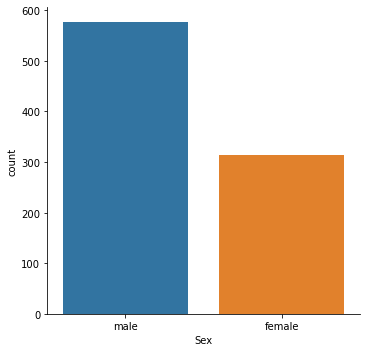

In [14]:
#Creating a factorplot, charting the number of male and female passengers
sns.catplot(x='Sex',data=titanic_df,kind='count')

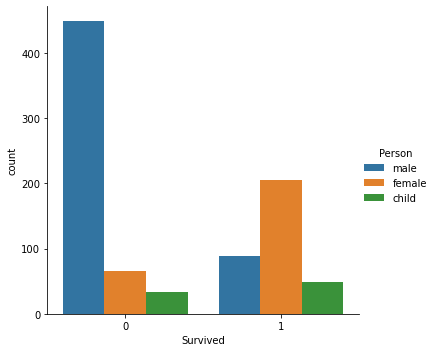

In [15]:
#Creating a factorplot, charting the number of male, female and child passengers
sns.catplot(x='Survived',data=titanic_df,hue='Person',kind='count')

Here we can see women are good at surviving compair to men

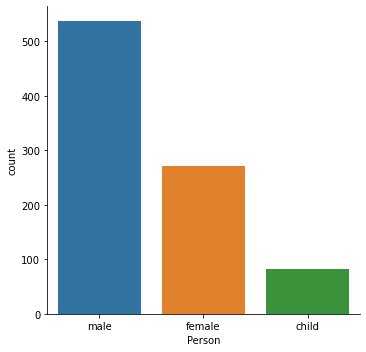

In [16]:
#Creating a factorplot, charting the number of male, female and child passengers
sns.catplot(x='Person',data=titanic_df,kind='count')

Unsurprisingly, there were considerably more male passengers onboard.

Let's take a look at how the passengers were divided among different classes.

Note: The Pclass attribute is a proxy for the socio-economic class of a person.

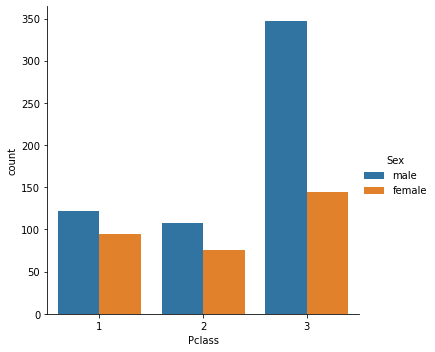

In [17]:
sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')

Now, let's create a factorplot to check out the distribution of men, women and children belonging to different classes.

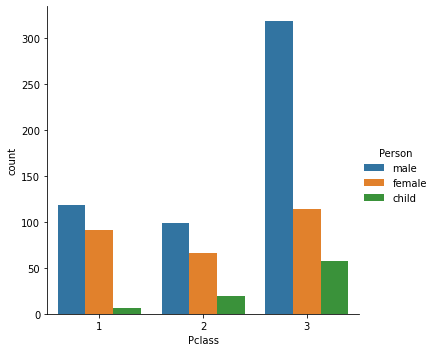

In [18]:
sns.catplot(x='Pclass',data=titanic_df,hue='Person',kind='count')

What's interesting to note above, is that there are way more male passengers than woman or childeren, in the 3rd class, than any other class. This will lead to an interesting analysis later on.

We can quickly create a histogram from the dataset, to check out the distribution of passengers of different age groups

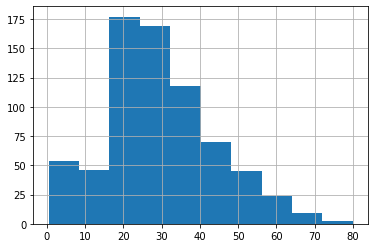

In [19]:
titanic_df['Age'].hist()

Let's check out how the age distribution varies for different classes. We'll use Seaborn's Facetgrid for this purpose.

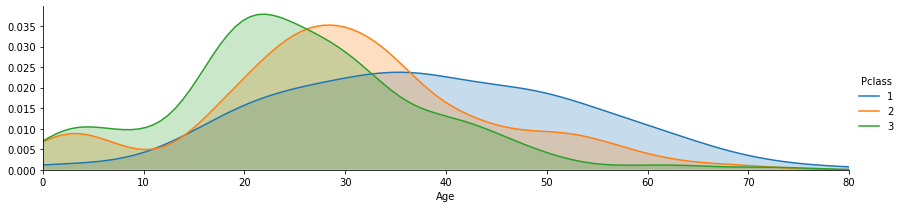

In [20]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Quite clearly, we can see that the first class passengers belonged more to the middle age groups, with very few children.

Second and third class had more children, with relatively fewer older people.

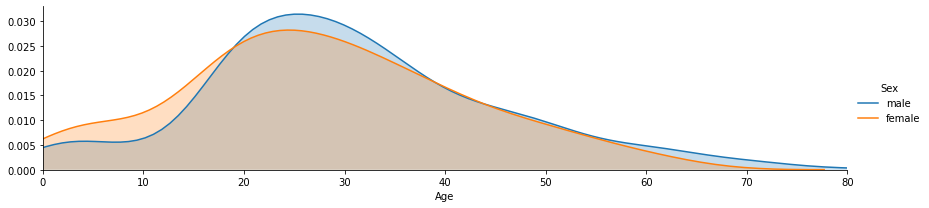

In [21]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

The age distribution seems to be less varied in terms of male and female passengers, though we can say that there more younger females than younger males.



# What deck were the passengers on and how does that relate to their class?


As we're doing open ended analysis, let's try and check out if people belonging to higher classes were assigned cabins on a higher deck (or level) of the ship.

In [22]:
#Because the cabin data was missing in a lot of cases, we can just drop it for now for this section.
deck_df = titanic_df.dropna(axis=0)

In [23]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female
